In [48]:
import yfinance as yf
import pandas as pd

# Define the company ticker (e.g., TSLA for Tesla)
ticker = "INFY"

# Fetch historical stock data
stock_data = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1d")
company = yf.Ticker(ticker)
income_stmt = company.income_stmt
balance_sheet = company.balance_sheet
cash_flow = company.cash_flow
info = company.info

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [46]:
import pandas as pd
df = pd.read_csv('income_statement.csv')

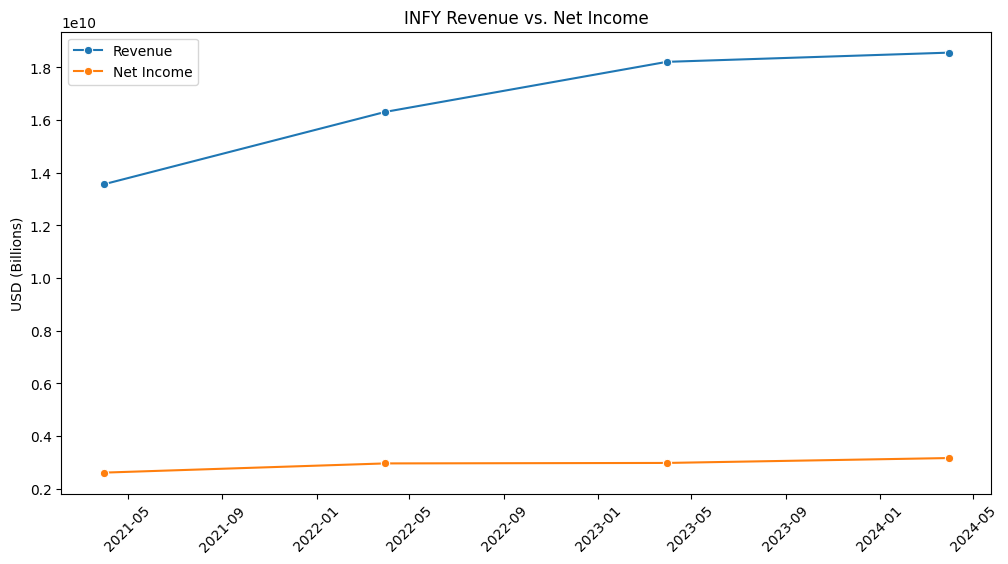

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract annual revenue and net income
revenue = income_stmt.loc['Total Revenue']
net_income = income_stmt.loc['Net Income']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue, label='Revenue', marker='o')
sns.lineplot(data=net_income, label='Net Income', marker='o')
plt.title(f"{ticker} Revenue vs. Net Income")
plt.ylabel("USD (Billions)")
plt.xticks(rotation=45)
plt.show()

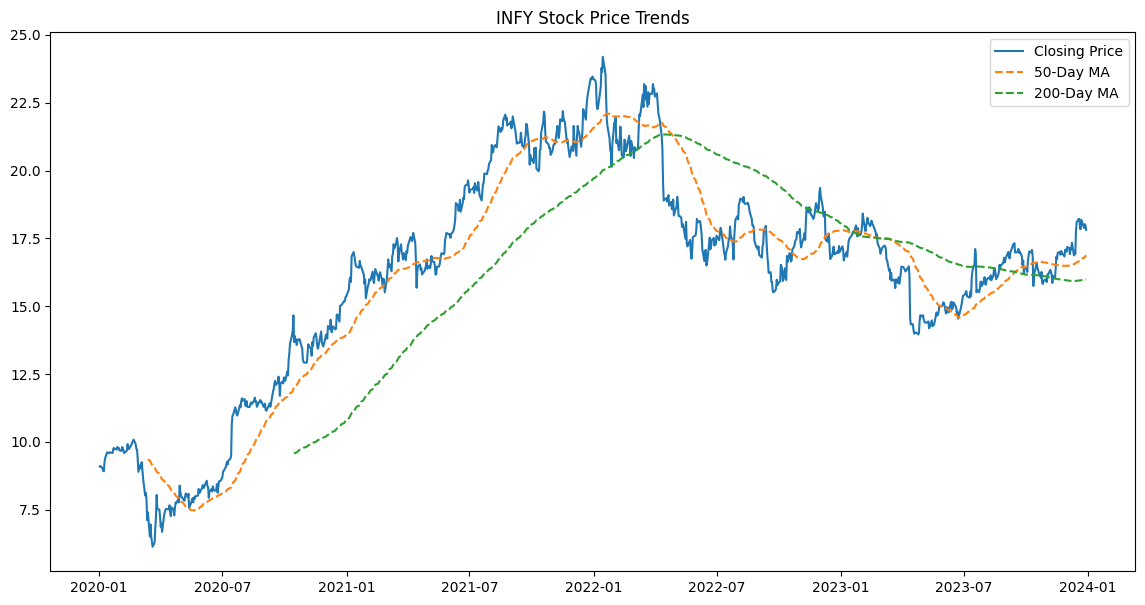

In [50]:
# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot stock price trends
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['MA50'], label='50-Day MA', linestyle='--')
plt.plot(stock_data['MA200'], label='200-Day MA', linestyle='--')
plt.title(f"{ticker} Stock Price Trends")
plt.legend()
plt.show()

In [51]:
# P/E Ratio (from Yahoo Finance data)
pe_ratio = info.get('trailingPE', 'N/A')

# Debt-to-Equity Ratio
total_debt = balance_sheet.loc['Total Debt'][0]
total_equity = balance_sheet.loc['Total Equity Gross Minority Interest'][0]
debt_to_equity = total_debt / total_equity

# Return on Equity (ROE)
roe = net_income[0] / total_equity

print(f"P/E Ratio: {pe_ratio:.2f}")
print(f"Debt-to-Equity: {debt_to_equity:.2f}")
print(f"ROE: {roe:.2%}")

P/E Ratio: 23.63
Debt-to-Equity: 0.09
ROE: 29.86%


<ipython-input-51-ebb811e53094>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_debt = balance_sheet.loc['Total Debt'][0]
<ipython-input-51-ebb811e53094>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_equity = balance_sheet.loc['Total Equity Gross Minority Interest'][0]
<ipython-input-51-ebb811e53094>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  roe = net_income[0] / total_equity


In [56]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pandas as pd

# Fetch data for a company (e.g., Apple)
ticker = "INFY"
company = yf.Ticker(ticker)

# Fetch financial statements
income_stmt = company.income_stmt.T         # Transpose for easier indexing
balance_sheet = company.balance_sheet.T
cash_flow = company.cashflow.T
info = company.info

# --------------------------
# 1. Profitability Metrics
# --------------------------
# Revenue, Net Income, Gross Margin
revenue = income_stmt['Total Revenue']
net_income = income_stmt['Net Income']
gross_margin = (income_stmt['Gross Profit'] / income_stmt['Total Revenue']) * 100

# Plot
fig_profit = make_subplots(rows=1, cols=3, subplot_titles=("Revenue", "Net Income", "Gross Margin"))
fig_profit.add_trace(go.Scatter(x=revenue.index, y=revenue, name="Revenue", line=dict(color='blue')), row=1, col=1)
fig_profit.add_trace(go.Scatter(x=net_income.index, y=net_income, name="Net Income", line=dict(color='green')), row=1, col=2)
fig_profit.add_trace(go.Scatter(x=gross_margin.index, y=gross_margin, name="Gross Margin (%)", line=dict(color='red')), row=1, col=3)
fig_profit.update_layout(title_text="Profitability Metrics", showlegend=False)

# --------------------------
# 2. Valuation Metrics
# --------------------------
# P/E Ratio, Market Cap
pe_ratio = info.get('trailingPE', 'N/A')
market_cap = info.get('marketCap', 'N/A')

fig_val = go.Figure()
fig_val.add_trace(go.Indicator(
    mode="number",
    value=pe_ratio,
    title={"text": "P/E Ratio"},
    domain={'row':0, 'column':0}
))
fig_val.add_trace(go.Indicator(
    mode="number",
    value=market_cap / 1e9,  # Convert to billions
    title={"text": "Market Cap (Billions USD)"},
    domain={'row':0, 'column':1}
))
fig_val.update_layout(grid={'rows':1, 'columns':2}, title="Valuation Metrics")

# --------------------------
# 3. Liquidity Metrics
# --------------------------
# Current Ratio, Quick Ratio
current_assets = balance_sheet['Current Assets']
current_liabilities = balance_sheet['Current Liabilities']
inventory = balance_sheet.get('Inventory', 0)  # Handle missing data

current_ratio = current_assets / current_liabilities
quick_ratio = (current_assets - inventory) / current_liabilities

fig_liq = go.Figure()
fig_liq.add_trace(go.Bar(
    x=current_ratio.index,
    y=current_ratio,
    name='Current Ratio',
    marker_color='purple'
))
fig_liq.add_trace(go.Bar(
    x=quick_ratio.index,
    y=quick_ratio,
    name='Quick Ratio',
    marker_color='orange'
))
fig_liq.update_layout(title="Liquidity Metrics", barmode='group')

# --------------------------
# 4. Debt Metrics
# --------------------------
# Debt-to-Equity, Interest Coverage
total_debt = balance_sheet['Total Debt']
total_equity = balance_sheet['Total Equity Gross Minority Interest']
debt_to_equity = total_debt / total_equity

ebit = income_stmt['Operating Income']
interest_expense = abs(income_stmt['Interest Expense'])  # Use absolute value
interest_coverage = ebit / interest_expense

fig_debt = make_subplots(rows=1, cols=2, subplot_titles=("Debt-to-Equity", "Interest Coverage"))
fig_debt.add_trace(go.Bar(x=debt_to_equity.index, y=debt_to_equity, name="Debt/Equity"), row=1, col=1)
fig_debt.add_trace(go.Bar(x=interest_coverage.index, y=interest_coverage, name="Interest Coverage"), row=1, col=2)
fig_debt.update_layout(title_text="Debt Metrics", showlegend=False)

# --------------------------
# Display All Graphs
# --------------------------
fig_profit.show()
fig_val.show()
fig_liq.show()
fig_debt.show()